In [1]:
import pandas as pd
import numpy as np

In [2]:
gl1 = pd.read_csv('data/final_PanelApp_CGC_genes.txt', header=None)[0].tolist()
gene_list2 = pd.read_csv('data/CBCG.csv')
gl2=gene_list2.Gene.str.rsplit('\xa0').str.get(0).unique().tolist()

In [3]:
clin_patient = pd.read_csv('data/data_clinical_patient.txt', sep='\t', comment='#')
clin_sample = pd.read_csv('data/data_clinical_sample.txt', sep='\t', comment='#')
mut = pd.read_csv('data/data_mutations.txt', sep='\t', comment='#')
cna = pd.read_csv('data/data_cna.txt', sep='\t')
rna = pd.read_csv('data/data_mrna_illumina_microarray_zscores_ref_diploid_samples.txt', sep='\t', comment='#')
meth = pd.read_csv('data/data_methylation_promoters_rrbs.txt', sep='\t')

### gene_list

In [4]:
len(gl1)

877

In [5]:
len(gl2)

623

In [6]:
gene_list_union = gl1+gl2
len(gene_list_union)

1500

In [7]:
gene_list = list(dict.fromkeys(gene_list_union))
len(gene_list)

1374

 ### mut

In [59]:
len(list(set(gene_list) & set(mut.Hugo_Symbol)))

85

In [72]:
len(list(set(gl1) & set(mut.Hugo_Symbol)))

81

In [73]:
len(list(set(gl2) & set(mut.Hugo_Symbol)))

33

### cna

In [65]:
len(list(set(gl1) & set(cna.Hugo_Symbol)))

850

In [68]:
len(list(set(gl2) & set(cna.Hugo_Symbol)))

511

In [66]:
len(list(set(gene_list) & set(cna.Hugo_Symbol)))

1237

### rna

In [69]:
len(list(set(gene_list) & set(rna.Hugo_Symbol)))

1221

In [70]:
len(list(set(gl1) & set(rna.Hugo_Symbol)))

848

In [71]:
len(list(set(gl2) & set(rna.Hugo_Symbol)))

499

### meth

In [74]:
len(list(set(gene_list) & set(meth.Hugo_Symbol)))

899

In [76]:
len(list(set(gl1) & set(meth.Hugo_Symbol)))

652

In [77]:
len(list(set(gl2) & set(meth.Hugo_Symbol)))

350

### merging patients

In [95]:
patients = list(set(mut.Tumor_Sample_Barcode) & set(cna.columns[2:]) & set(rna.columns[2:]) & set(meth.columns[1:]))

In [97]:
len(patients)

1378

# PROCESSING

per il momento filtro solo in base ai geni, il filtraggio sulla base dei pazienti lo farò alla fine sulla base di quanti dati mancanti ci saranno

## mut processing

In [10]:
print('mut')
print('number of genes: ',len(mut.Hugo_Symbol.unique()))
print('number of columns: ',len(mut))

mut
number of genes:  173
number of columns:  17272


In [116]:
mut_filter = mut[['Hugo_Symbol','Tumor_Sample_Barcode']].copy()
mut_filter = mut_filter[mut_filter['Hugo_Symbol'].isin(gene_list)]
#mut_filter = mut_filter[mut_filter['Tumor_Sample_Barcode'].isin(patients)]
mut_filter

,Hugo_Symbol,Tumor_Sample_Barcode
0,TP53,MTS-T0058
1,TP53,MTS-T0058
3,NF2,MTS-T0058
4,SF3B1,MTS-T0059
6,EGFR,MTS-T0059
...,...,...
17267,PIK3CA,MB-0906
17268,PIK3CA,MB-0906
17269,TP53,MB-0906
17270,JAK1,MB-0906


In [117]:
mut_matrix = pd.crosstab(mut_filter['Tumor_Sample_Barcode'], mut_filter['Hugo_Symbol'])
mut_matrix.index.name = None
mut_matrix.columns.name = None
mut_matrix

,AKAP9,AKT1,AKT2,ALK,APC,ARID1A,ARID1B,ARID2,ASXL1,ASXL2,...,SMAD4,SMARCB1,SMARCD1,STK11,TBL1XR1,TBX3,TG,TP53,UBR5,USP9X
MB-0002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
MB-0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MB-0006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MB-0008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
MB-0010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTS-T2428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MTS-T2429,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
MTS-T2430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MTS-T2431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [122]:
# controllo che non ci siano nan
pd.unique(mut_matrix.values.ravel())

array([ 0,  1,  2,  5,  3,  4, 11,  6], dtype=int64)

In [123]:
# elimino info del conto del numero di mutazioni
mut_matrix[mut_matrix != 0] = 1
pd.unique(mut_matrix.values.ravel())

array([0, 1], dtype=int64)

In [124]:
# cambio nome a colonne
mut_matrix.columns = mut_matrix.columns + '_mut'
#aggiungo colonna per indicare provenienza che pazienti fanno parte di questo dataset
mut_matrix['mut'] = True
# aggiungo colonna geni
mut_matrix['Hugo_Symbol'] = mut_matrix.index
#cambio indici
mut_matrix.set_index(np.arange(len(mut_matrix)), inplace=True)
mut_matrix

,AKAP9_mut,AKT1_mut,AKT2_mut,ALK_mut,APC_mut,ARID1A_mut,ARID1B_mut,ARID2_mut,ASXL1_mut,ASXL2_mut,...,SMARCD1_mut,STK11_mut,TBL1XR1_mut,TBX3_mut,TG_mut,TP53_mut,UBR5_mut,USP9X_mut,mut,Hugo_Symbol
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,True,MB-0002
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,MB-0005
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,MB-0006
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,True,MB-0008
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,True,MB-0010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,MTS-T2428
2314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,MTS-T2429
2315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,MTS-T2430
2316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,True,MTS-T2431


## cna processing

In [22]:
print('cna')
print('number of genes: ',len(cna.Hugo_Symbol.unique()))
print('number of columns: ',len(cna))

cna
number of genes:  22542
number of columns:  22544


In [112]:
cna_filter = cna.drop('Entrez_Gene_Id', axis=1).copy()
cna_filter = cna_filter[cna_filter['Hugo_Symbol'].isin(gene_list)]
cna_filter

,Hugo_Symbol,MB-0000,MB-0039,MB-0045,MB-0046,MB-0048,MB-0050,MB-0053,MB-0062,MB-0064,...,MB-5467,MB-5546,MB-5585,MB-5625,MB-5648,MB-6020,MB-6213,MB-6230,MB-7148,MB-7188
2,A1CF,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
51,ABCB1,0,-1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
84,ABCG2,0,0,-1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,ABHD8,0,0,0,-1,2,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,ABI1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22423,ZNF805,0,0,-1,1,0,-1,0,-1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22486,ZNRF3,0,0,-1,-1,-1,-1,0,1,0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0
22501,ZRSR2,0,0,0,-1,0,0,-1,1,0,...,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0
22514,ZSCAN25,0,-1,-1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0


In [125]:
cna_matrix = cna_filter.T.copy()
cna_matrix

,2,51,84,108,109,113,114,119,151,152,...,22128,22136,22159,22193,22241,22423,22486,22501,22514,22542
Hugo_Symbol,A1CF,ABCB1,ABCG2,ABHD8,ABI1,ABL1,ABL2,ABR,ACD,ACE,...,ZNF429,ZNF439,ZNF479,ZNF521,ZNF577,ZNF805,ZNRF3,ZRSR2,ZSCAN25,ZZEF1
MB-0000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MB-0039,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
MB-0045,0,0,-1,0,0,0,-1,-1,-1,1,...,0,0,0,-1,0,-1,-1,0,-1,-2
MB-0046,0,0,0,-1,0,0,2,0,-1,0,...,-1,-1,0,0,0,1,-1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-6020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,1.0,0.0,-1.0
MB-6213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-6230,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-7148,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
cna_matrix = cna_filter.T.copy()
cna_matrix.columns = cna_matrix.iloc[0]
cna_matrix.columns.name = None
cna_matrix = cna_matrix.drop('Hugo_Symbol')
cna_matrix.columns = cna_matrix.columns + '_cna'
cna_matrix

,A1CF_cna,ABCB1_cna,ABCG2_cna,ABHD8_cna,ABI1_cna,ABL1_cna,ABL2_cna,ABR_cna,ACD_cna,ACE_cna,...,ZNF429_cna,ZNF439_cna,ZNF479_cna,ZNF521_cna,ZNF577_cna,ZNF805_cna,ZNRF3_cna,ZRSR2_cna,ZSCAN25_cna,ZZEF1_cna
MB-0000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MB-0039,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
MB-0045,0,0,-1,0,0,0,-1,-1,-1,1,...,0,0,0,-1,0,-1,-1,0,-1,-2
MB-0046,0,0,0,-1,0,0,2,0,-1,0,...,-1,-1,0,0,0,1,-1,-1,0,-1
MB-0048,1,0,0,2,1,0,0,-1,0,0,...,2,-1,1,0,1,0,-1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-6020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,1.0,0.0,-1.0
MB-6213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-6230,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-7148,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# verifico presenza di nan
pd.unique(cna_matrix.values.ravel())

array([0, 1, -1, 2, -2, nan], dtype=object)

In [137]:
# nan concentrati in ultime 86 righe
print(pd.unique(cna_matrix.iloc[:-86].values.ravel()))
print(pd.unique(cna_matrix.iloc[-86:].values.ravel()))

[0 1 -1 2 -2]
[0.0 -1.0 1.0 2.0 nan -2.0]


In [167]:
# trovo in che colonne sono i nan
subset = cna_matrix.iloc[-86:]
a = subset.isna().sum()
a[a!=0]#.index

APOBEC3B_cna      6
CEBPA_cna         1
GSTM1_cna        31
GSTT1_cna        35
HLA-A_cna         3
HLA-B_cna         1
HLA-DRB1_cna     20
OR2A1-AS1_cna     4
OR4C11_cna        8
OR4P4_cna        23
RECQL4_cna        1
dtype: int64

In [176]:
# o si eliminano le colonne oppure si fa imputazione. Dato che i geni non sono così rilevanti elimino colonne
cols_to_delete = a[a!=0].index.tolist()
cna_matrix = cna_matrix.drop(cols_to_delete,axis=1)

In [177]:
print(pd.unique(cna_matrix.values.ravel()))

[0 1 -1 2 -2]


In [178]:
cna_matrix['cna'] = True
cna_matrix['Hugo_Symbol'] = cna_matrix.index
cna_matrix.set_index(np.arange(len(cna_matrix)), inplace=True)

cna_matrix

,A1CF_cna,ABCB1_cna,ABCG2_cna,ABHD8_cna,ABI1_cna,ABL1_cna,ABL2_cna,ABR_cna,ACD_cna,ACE_cna,...,ZNF479_cna,ZNF521_cna,ZNF577_cna,ZNF805_cna,ZNRF3_cna,ZRSR2_cna,ZSCAN25_cna,ZZEF1_cna,cna,Hugo_Symbol
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,MB-0000
1,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,True,MB-0039
2,0,0,-1,0,0,0,-1,-1,-1,1,...,0,-1,0,-1,-1,0,-1,-2,True,MB-0045
3,0,0,0,-1,0,0,2,0,-1,0,...,0,0,0,1,-1,-1,0,-1,True,MB-0046
4,1,0,0,2,1,0,0,-1,0,0,...,1,0,1,0,-1,0,0,-1,True,MB-0048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,2.0,...,0.0,0.0,1.0,1.0,-1.0,1.0,0.0,-1.0,True,MB-6020
2169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,MB-6213
2170,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,MB-6230
2171,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,MB-7148


## rna processing

In [57]:
print('rna')
print('number of genes: ',len(rna.Hugo_Symbol.unique()))
print('number of columns: ',len(rna))

rna
number of genes:  20387
number of columns:  20603


In [179]:
rna_filter = rna.drop('Entrez_Gene_Id', axis=1).copy()
rna_filter = rna_filter[rna_filter['Hugo_Symbol'].isin(gene_list)]
rna_filter

,Hugo_Symbol,MB-0362,MB-0346,MB-0386,MB-0574,MB-0185,MB-0503,MB-0641,MB-0201,MB-0218,...,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313,MB-4823
15,PML,-0.9110,-1.6646,-0.3960,-1.0946,-0.8347,-0.9199,-0.1196,-0.9277,-0.9398,...,-1.1303,-1.2092,0.5002,-0.1601,-0.1816,0.3811,0.0760,-0.0219,4.8983,-0.0035
21,TAF15,-0.2401,-2.4381,-1.1065,0.5952,-1.4431,1.4777,0.3607,-0.1850,-0.2814,...,1.5227,0.7573,1.4587,0.9624,-0.5078,0.8923,0.0742,1.3279,-0.3263,1.9877
62,RPS24,-1.1432,1.0870,1.6549,0.7074,1.0872,-0.4941,-0.7046,0.2650,-0.3135,...,-0.2008,0.4774,-0.4963,0.4342,0.4310,-0.5083,2.0264,-0.5701,-3.2027,0.8065
73,IL21R,-0.8328,-0.9125,0.0423,-0.6198,0.2501,-1.3432,-0.5463,-0.1493,-0.6887,...,-0.6411,-0.6210,3.1505,-0.9717,-0.3027,-0.3937,-0.4054,0.4332,-0.3487,-0.8326
95,ATG10,-2.1166,-0.2538,-0.3592,-0.0573,-1.4535,-1.0924,-0.0025,-1.1277,-0.3595,...,-1.0390,-0.3897,0.5033,0.1945,-0.0689,1.1668,0.0465,0.2614,4.9125,1.0587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20531,ECHDC1,-0.6473,-0.7160,-0.9121,-1.0395,0.2731,-0.4724,-0.9759,-1.1870,0.1939,...,0.9522,1.4261,1.3169,0.7755,2.6902,1.9618,-0.1879,-0.5624,-1.4610,-0.0939
20541,ROBO2,2.5854,1.3341,-0.2575,-0.5945,1.0789,-0.6775,-0.8606,-0.3838,0.6274,...,-0.4092,0.3843,-0.4125,-0.5326,-0.5877,-0.3701,1.0675,0.3216,0.1721,-0.1560
20549,GNA11,0.3025,0.8814,-0.5970,0.4851,1.7536,-0.2628,-0.0329,-0.8749,-0.9209,...,-0.6571,-0.0808,-2.3378,-0.8751,-0.8883,-0.7370,-0.0343,-0.7096,2.7619,-0.5906
20577,ELANE,0.2354,-0.5735,-0.0676,-0.3486,0.9580,0.7636,2.8710,-0.6868,-0.8765,...,-1.0325,0.0685,-0.0049,0.7688,-0.3376,1.4991,0.6088,1.7950,0.2371,0.0132


In [180]:
rna_matrix = rna_filter.T.copy()
rna_matrix.columns = rna_matrix.iloc[0]
rna_matrix.columns.name = None
rna_matrix = rna_matrix.drop('Hugo_Symbol')
rna_matrix.columns = rna_matrix.columns + '_rna'
rna_matrix['rna'] = True
rna_matrix['Hugo_Symbol'] = rna_matrix.index
rna_matrix.set_index(np.arange(len(rna_matrix)), inplace=True)

rna_matrix

,PML_rna,TAF15_rna,RPS24_rna,IL21R_rna,ATG10_rna,CREB3L2_rna,FUBP1_rna,BIRC6_rna,SLC14A2_rna,ANTXR1_rna,...,SRRM2_rna,EPAS1_rna,DDX5_rna,ECHDC1_rna,ROBO2_rna,GNA11_rna,ELANE_rna,CSMD3_rna,rna,Hugo_Symbol
0,-0.911,-0.2401,-1.1432,-0.8328,-2.1166,-0.4891,0.2984,-1.1909,0.4381,0.023,...,0.0689,-0.0815,-0.4397,-0.6473,2.5854,0.3025,0.2354,-0.5286,True,MB-0362
1,-1.6646,-2.4381,1.087,-0.9125,-0.2538,-0.0684,-0.2625,0.0438,0.01,-1.6128,...,-1.9177,-1.0432,-0.253,-0.716,1.3341,0.8814,-0.5735,-0.4379,True,MB-0346
2,-0.396,-1.1065,1.6549,0.0423,-0.3592,-0.4194,-1.0663,-1.8878,-0.0903,0.209,...,-0.4422,1.5602,-2.1002,-0.9121,-0.2575,-0.597,-0.0676,6.9258,True,MB-0386
3,-1.0946,0.5952,0.7074,-0.6198,-0.0573,-0.3515,-0.0753,-0.8252,0.1274,-0.1051,...,0.8772,-1.4632,-1.0945,-1.0395,-0.5945,0.4851,-0.3486,1.0466,True,MB-0574
4,-0.8347,-1.4431,1.0872,0.2501,-1.4535,0.4408,-0.526,-0.3648,-0.6895,0.1547,...,1.3356,1.5946,0.1599,0.2731,1.0789,1.7536,0.958,-0.106,True,MB-0185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,0.3811,0.8923,-0.5083,-0.3937,1.1668,-0.568,0.3973,1.5175,-1.3913,-0.155,...,0.996,1.4954,1.7828,1.9618,-0.3701,-0.737,1.4991,0.0706,True,MB-5453
1976,0.076,0.0742,2.0264,-0.4054,0.0465,0.1275,0.1029,1.5956,-0.8303,0.8617,...,0.1279,0.1233,-0.6462,-0.1879,1.0675,-0.0343,0.6088,0.1188,True,MB-5471
1977,-0.0219,1.3279,-0.5701,0.4332,0.2614,0.4118,2.5765,0.6813,-0.0624,-1.5597,...,0.594,-1.7943,1.2346,-0.5624,0.3216,-0.7096,1.795,-0.3231,True,MB-5127
1978,4.8983,-0.3263,-3.2027,-0.3487,4.9125,-2.7902,1.5779,0.7118,4.3637,0.3685,...,1.509,-2.6935,-5.3682,-1.461,0.1721,2.7619,0.2371,-0.1251,True,MB-4313


In [187]:
#nan?
rna_matrix.isna().sum().unique()

array([0], dtype=int64)

## meth processing

In [62]:
print('meth')
print('number of genes: ',len(meth.Hugo_Symbol.unique()))
print('number of columns: ',len(meth))

meth
number of genes:  13184
number of columns:  13188


In [188]:
meth_filter = meth.copy()
meth_filter = meth_filter[meth_filter['Hugo_Symbol'].isin(gene_list)]
meth_filter

,Hugo_Symbol,MB-0006,MB-0028,MB-0035,MB-0046,MB-0050,MB-0053,MB-0054,MB-0062,MB-0064,...,MB-7279,MB-7281,MB-7283,MB-7285,MB-7288,MB-7289,MB-7291,MB-7292,MB-7293,MB-7296
47,ABCG2,0.000699,0.032000,0.082621,0.033473,0.000000,0.021878,0.056075,0.004827,0.073198,...,0.057618,0.003413,0.307398,0.004662,0.042394,0.013279,0.059536,0.472119,0.031250,0.002404
68,ABHD8,0.036364,0.037975,0.000000,0.105263,0.033333,0.260163,0.178218,0.047904,0.117117,...,0.323529,0.200000,0.201299,0.271739,0.061538,0.068182,0.103659,0.035714,0.113043,0.044118
70,ABL1,0.002083,0.002597,0.002309,0.000000,0.000000,0.000000,0.004338,0.000000,0.012821,...,0.000000,0.000000,0.009671,0.004926,0.000000,0.000000,0.001957,0.004587,0.000000,0.000000
71,ABL2,0.009709,0.012132,0.000000,0.000000,0.004515,0.004098,0.003810,0.002088,0.003953,...,0.000000,0.000000,0.014663,0.008163,0.001936,0.000000,0.000000,0.004630,0.000000,0.012739
76,ABR,0.000000,0.013201,0.000000,0.002825,0.006369,0.000000,0.007018,0.001912,0.021739,...,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13121,ZNF805,0.003030,0.007619,0.034146,0.000000,0.000000,0.001263,0.014953,0.000000,0.006593,...,0.000000,0.016985,0.071066,0.062099,0.003221,0.001908,0.002053,0.054839,0.003623,0.033473
13155,ZNRF3,0.000000,0.000000,0.000000,0.000000,0.000000,0.002941,0.007126,0.000000,0.009524,...,0.000000,0.007576,0.001672,0.000000,0.005181,0.000000,0.010836,0.000000,0.003390,0.000000
13162,ZRSR2,0.005195,0.002674,0.000000,0.000000,0.002315,0.003289,0.000000,0.012097,0.000000,...,0.002506,0.001282,0.000000,0.024306,0.000000,0.000000,0.030905,0.000000,0.001996,0.011236
13170,ZSCAN25,0.001012,0.002933,0.010073,0.004608,0.001953,0.003452,0.006173,0.001270,0.004386,...,0.000000,0.001111,0.021352,0.000000,0.002538,0.001493,0.001153,0.002404,0.002506,0.000000


In [189]:
meth_matrix = meth_filter.T.copy()
meth_matrix.columns = meth_matrix.iloc[0]
meth_matrix.columns.name = None
meth_matrix = meth_matrix.drop('Hugo_Symbol')
meth_matrix.columns = meth_matrix.columns + '_meth'
meth_matrix['meth'] = True
meth_matrix['Hugo_Symbol'] = meth_matrix.index
meth_matrix.set_index(np.arange(len(meth_matrix)), inplace=True)

meth_matrix

,ABCG2_meth,ABHD8_meth,ABL1_meth,ABL2_meth,ABR_meth,ACD_meth,ACE_meth,ACOXL_meth,ACSL6_meth,ACTA2_meth,...,ZNF384_meth,ZNF429_meth,ZNF521_meth,ZNF805_meth,ZNRF3_meth,ZRSR2_meth,ZSCAN25_meth,ZZEF1_meth,meth,Hugo_Symbol
0,0.000699,0.036364,0.002083,0.009709,0.0,0.0,0.176471,0.306569,0.030744,0.001455,...,0.0,0.0,0.0,0.00303,0.0,0.005195,0.001012,0.00277,True,MB-0006
1,0.032,0.037975,0.002597,0.012132,0.013201,0.005764,0.007547,0.182266,0.022989,0.003115,...,0.004219,0.0,0.0,0.007619,0.0,0.002674,0.002933,0.004566,True,MB-0028
2,0.082621,0.0,0.002309,0.0,0.0,0.0,0.34,0.328767,0.027094,0.001183,...,0.015385,0.0,0.024845,0.034146,0.0,0.0,0.010073,0.0,True,MB-0035
3,0.033473,0.105263,0.0,0.0,0.002825,0.00565,0.455696,0.137255,0.016753,0.001088,...,0.0,NaN,0.016667,0.0,0.0,0.0,0.004608,0.0,True,MB-0046
4,0.0,0.033333,0.0,0.004515,0.006369,0.0,0.0,0.234921,0.018018,0.004141,...,0.003378,NaN,0.0,0.0,0.0,0.002315,0.001953,0.0,True,MB-0050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,0.013279,0.068182,0.0,0.0,0.0,0.001597,0.027586,0.22623,0.020649,0.003289,...,0.0,NaN,0.0,0.001908,0.0,0.0,0.001493,0.0,True,MB-7289
1414,0.059536,0.103659,0.001957,0.0,0.0,0.0,0.0,0.260526,0.028902,0.001346,...,0.0,0.0,0.010152,0.002053,0.010836,0.030905,0.001153,0.002825,True,MB-7291
1415,0.472119,0.035714,0.004587,0.00463,0.0,0.0,0.05814,0.441441,0.040201,0.00489,...,0.00905,0.025,0.0,0.054839,0.0,0.0,0.002404,NaN,True,MB-7292
1416,0.03125,0.113043,0.0,0.0,0.0,0.002222,0.013483,0.188596,0.014479,0.0,...,0.0,0.0,0.0,0.003623,0.00339,0.001996,0.002506,0.012821,True,MB-7293


In [192]:
meth_matrix.isna().sum().max()#.unique()

423

In [193]:
meth_matrix.isna().sum().unique()

array([  0,   2,   3,  30,   9, 119,   1,  56,  34, 123,  60,  22, 385,
        21,   8, 319, 136,  50,  12,  82,   5, 118,  17,   4, 184, 276,
        70,   6,  23, 218,  14,  15,  11, 225, 165,  35, 162, 126, 125,
       409, 160,  28, 132, 267, 404,  81,  76,  99,  40,  83, 103,  10,
        19,  58,  61, 216,  38, 111,  18,  16,  39,  20, 185,  32, 113,
       159,  29, 242,  33,  53, 157, 124, 227,  51,  55,  13,  93, 210,
        43,  64,  24,  87,  48, 386, 107, 209,  26,  74, 373,  52, 188,
         7,  27,  95,  86,  45,  37, 238, 199,  85, 171, 243, 333, 101,
       110, 402,  44, 155,  90,  63, 286, 368,  31, 135, 236, 322, 152,
       154,  88,  66, 190, 156, 193,  79,  77, 230, 153, 215,  73, 102,
        42, 146,  84,  62, 277, 293, 140, 164,  49, 142, 311, 145, 221,
       183, 300, 310, 133,  75, 254, 331, 291,  92,  46, 173,  78, 131,
       167, 278, 128, 201,  47, 342, 249, 375,  72, 180,  59, 358, 273,
       239, 408, 109, 217,  54, 363, 179,  25,  98, 423, 112, 10

<Axes: ylabel='Frequency'>

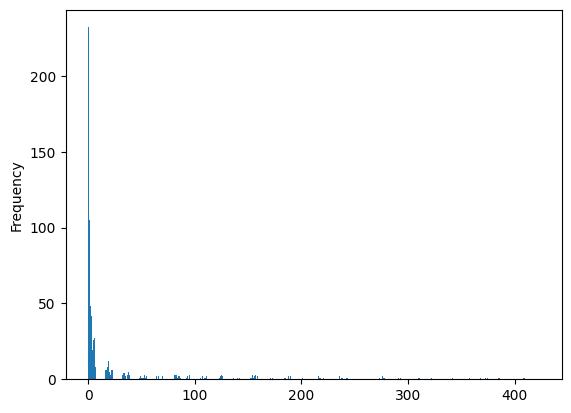

In [197]:
meth_matrix.isna().sum().plot.hist(bins=len(meth_matrix.columns)-2)

In [201]:
serie = meth_matrix.isna().sum()
serie[serie>10]

ABR_meth        30
ACE_meth       119
ACVR1B_meth     56
ACVR2A_meth     34
AFF3_meth      123
              ... 
ZFPM2_meth      30
ZMIZ1_meth      31
ZNF429_meth    236
ZNF521_meth    105
ZNRF3_meth      14
Length: 353, dtype: int64

In [ ]:
# definisci questione imputazione o cancellazione colonne metilazione

## merge all data

Genomic data

In [202]:
matrix_gen = mut_matrix.merge(cna_matrix, left_on='Hugo_Symbol', right_on='Hugo_Symbol', how='outer')
matrix_gen = matrix_gen.merge(rna_matrix, left_on='Hugo_Symbol', right_on='Hugo_Symbol', how='outer')
matrix_gen = matrix_gen.merge(meth_matrix, left_on='Hugo_Symbol', right_on='Hugo_Symbol', how='outer')
matrix_gen

,AKAP9_mut,AKT1_mut,AKT2_mut,ALK_mut,APC_mut,ARID1A_mut,ARID1B_mut,ARID2_mut,ASXL1_mut,ASXL2_mut,...,ZNF365_meth,ZNF384_meth,ZNF429_meth,ZNF521_meth,ZNF805_meth,ZNRF3_meth,ZRSR2_meth,ZSCAN25_meth,ZZEF1_meth,meth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040219,0.0,0.0,0.0,0.00303,0.0,0.005195,0.001012,0.00277,True
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005848,0.002439,0.0,0.0,0.011561,0.019481,0.002865,0.0,0.0,True
2479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035343,0.01476,0.0,0.015625,0.040509,0.00627,0.0,0.010601,0.0,True
2480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clinical data

In [203]:
matrix_clin = clin_patient.merge(clin_sample, left_on='PATIENT_ID', right_on='PATIENT_ID', how='inner')
matrix_clin.columns

Index(['PATIENT_ID', 'LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 'CELLULARITY',
       'CHEMOTHERAPY', 'COHORT', 'ER_IHC', 'HER2_SNP6', 'HORMONE_THERAPY',
       'INFERRED_MENOPAUSAL_STATE', 'SEX', 'INTCLUST', 'AGE_AT_DIAGNOSIS',
       'OS_MONTHS', 'OS_STATUS', 'CLAUDIN_SUBTYPE', 'THREEGENE',
       'VITAL_STATUS', 'LATERALITY', 'RADIO_THERAPY', 'HISTOLOGICAL_SUBTYPE',
       'BREAST_SURGERY', 'RFS_STATUS', 'RFS_MONTHS', 'SAMPLE_ID',
       'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'ER_STATUS', 'HER2_STATUS',
       'GRADE', 'ONCOTREE_CODE', 'PR_STATUS', 'SAMPLE_TYPE', 'TUMOR_SIZE',
       'TUMOR_STAGE', 'TMB_NONSYNONYMOUS'],
      dtype='object')

In [204]:
matrix = matrix_gen.merge(matrix_clin, left_on='Hugo_Symbol', right_on='PATIENT_ID', how='inner')

matrix.loc[matrix['mut'] != True, 'mut'] = False
matrix.loc[matrix['cna'] != True, 'cna'] = False
matrix.loc[matrix['rna'] != True, 'rna'] = False
matrix.loc[matrix['meth'] != True, 'meth'] = False

matrix

,AKAP9_mut,AKT1_mut,AKT2_mut,ALK_mut,APC_mut,ARID1A_mut,ARID1B_mut,ARID2_mut,ASXL1_mut,ASXL2_mut,...,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,GRADE,ONCOTREE_CODE,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE,TUMOR_STAGE,TMB_NONSYNONYMOUS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,10.0,1.0,2.615035
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,15.0,2.0,2.615035
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,2.0,MDLC,Positive,Primary,25.0,2.0,1.307518
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,3.0,MDLC,Positive,Primary,40.0,2.0,2.615035
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,31.0,4.0,5.230071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Breast Invasive Ductal Carcinoma,Positive,Positive,2.0,IDC,Negative,Primary,20.0,NaN,0.000000
2478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,22.0,NaN,0.000000
2479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,21.0,NaN,0.000000
2480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Invasive Breast Carcinoma,Positive,Negative,3.0,BRCA,Positive,Primary,130.0,NaN,0.000000


In [ ]:
# save in file .txt

In [205]:
matrix.to_csv('data/data_final.txt', sep='\t', index=False)

In [138]:
#ciao = pd.read_csv('data/data_final.txt', sep='\t')

C:\Users\simacri\AppData\Local\Temp\ipykernel_15740\387607195.py:1: DtypeWarning: Columns (3461,3462,3465,3466,3467,3469,3472,3473,3474,3475,3476,3477,3479,3487,3490) have mixed types. Specify dtype option on import or set low_memory=False.
  ciao = pd.read_csv('data/data_final.txt', sep='\t')


In [89]:
print('mut: ',len(set(mut.Tumor_Sample_Barcode)))
print('cna: ',len(set(cna.columns[2:])))
print('rna: ',len(set(rna.columns[2:])))
print('meth: ',len(set(meth.columns[1:])))

clin_patient:  2509
clin_sample:  2509
mut:  2369
cna:  2173
rna:  1980
meth:  1418


In [ ]:
### puoi prima usare solo mut e cna, poi aggiungere rna e infine meth
# ad ogni passaggio interesechi i pazienti
# sennò troppi nan

[6/13 8:26 PM] Luca Anzalone
Buonasera Silvia, le mail ci sono arrivate e sia io che Simone (l'altro tutor) abbiamo visionato la proposta di progetto ed inviato un feedback al professore che, però, ancora non ci ha dato un riscontro: domani gli invio un sollecito. Secondo me il dataset è interessante però credo che il problema sia da riformulare, cioè essendo tutti i pazienti del dataset affetti da tumore fare una classificazione sul tipo di tumore (non avendo una classe non-tumore) ha poco senso, anche perché il dataset è pensato per predire se un paziente sopravvivrà oppure no: vedi la variabile target "overall_survival" nei dati clinici.  Poi ci sono le variabili riguardo le mutazioni genetiche e di RNA: queste sarebbero più interessanti dei dati clinici (perchè di livello più basso, e cioè meno comprese/studiate) per addestrare un modello di ML. Quindi rimani in attesa di una comunicazione da parte del professore, e scusaci per il delay. 

Considera che tu hai features riguardo: dati clinici C, mutazioni M e geni mRNA G. Quindi uno stesso problema lo puoi affrontare addestrando solo su C, oppure solo su M+G, o anche su C+M+G. Anche fare solo un confronto del genere può avere un senso biologico (almeno credo perchè non sono del campo), perchè se usando C ottieni X% di prestazioni, e con M+G ottieni una percentuale simile allora vuol dire che c'è una qualche correlazione (nascosta) che ti permette di inferire le variabili cliniche o almeno correlate ad esse. Invece, se con C+M+G la percentuale aumenta allora M e G contengono delle feature discriminanti in più di C, altrimenti se X% rimane invariata o diminuisce allora vuol dire che o non sono utili (ridondanti) oppure che è difficile estrarre informazione da esse. A parte questo direi che le variabili cliniche che puoi usare come target (sia per regressione o classificazione) sarebbero: cancer_type_detailed, mutation_count, overall_survival, overall_survival_months, gene_classifier_subtype, tumor_size o tumor_stage. Ora intendo che ognuna di essere definirebbe un problema a parte, da cui puoi usare le features di M e/o G per vedere se c'è una relazione: se riesci a predire una quantità sufficientemente bene, allora esiste una relazione tra le features ed il target. Non so cosa il professore deciderà ma tieni conto anche di questo per determinare il problema che vorrai affrontare. Per i tempi non so darti una risposta precisa, ma so che in questo periodo è impegnato con la correzione di alcuni progetti ma di un altro corso. 